#Как обнаружить и классифицировать дорожные знаки с помощью TensorFlow

В этом руководстве мы создадим приложение для обнаружения и классификации дорожных знаков. К концу этого урока вы сможете построить это:


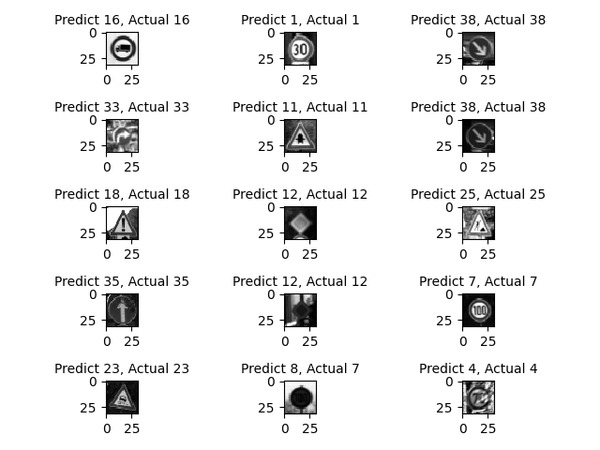

Наша цель — создать ранний прототип системы, которую можно будет использовать в беспилотном автомобиле или другом автономном транспортном средстве.

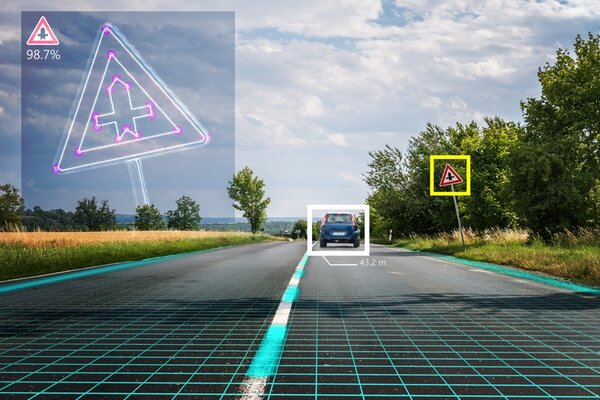

Когда вы работаете с учебниками по робототехнике или любой другой области технологий, сосредоточьтесь на конечной цели. Сосредоточьтесь на подлинной, реальной проблеме, которую вы пытаетесь решить, а не на инструментах, которые используются для решения этой проблемы.

Не увязайте в попытках понять каждую деталь математики и библиотек, которые вам нужно использовать для разработки приложения. Не застрять в кроличьих норах. Не пытайтесь выучить все сразу.

Сосредоточьтесь на входных данных, выходных данных и том, что алгоритм должен делать на высоком уровне. Как вы увидите в этом руководстве, вам не нужно изучать все аспекты компьютерного зрения, прежде чем разрабатывать надежную систему классификации дорожных знаков.

Подготовьте и запустите работающий детектор дорожных знаков и классификатор; а позже, когда вы захотите усложнить свой проект или написать исследовательскую работу, не стесняйтесь вернуться к кроличьим норам, чтобы получить полное представление о том, что происходит под капотом.

Пытаться понять все до мельчайших деталей — все равно, что пытаться создать собственную базу данных с нуля, чтобы запустить веб-сайт, или пройти курс обучения двигателям внутреннего сгорания, чтобы научиться водить машину.

Давайте приступим!

##Датасет

Первое, что нам нужно сделать, это найти набор данных дорожных знаков.

Мы будем использовать популярный набор данных German Traffic Sign Recognition Benchmark. Этот набор данных состоит из более чем 43 различных типов дорожных знаков и более 50 000 изображений. Каждое изображение содержит один дорожный знак

Ссылка с описанием датасета
https://benchmark.ini.rub.de/


Чтобы начать работать с датасетом загрузим его архив и извлечем все необходимые файлы. Сохраним пути к датасету в соответсвующих переменных.
Этот код написан для использования Google Colab. Если вы запускаете данный ноутбук у себя на компьютере или в другой среде исполнения - укажите пути, которые Вам подходят.

Чтобы иметь возможность загружать датасеты напрямую из Kaggle прочитайте инструкцию - https://www.kaggle.com/general/156610

Ссылка на описание датасета
https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [63]:
from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import files
files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aymaslov","key":"442e9dae1ad264e0597b7cfedfef6be5"}'}

Устанавливаем библиотеку по работе с Kaggle

In [64]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Загружаем датасет с изображениями знаком и аннотациями к ним

German Traffic Sign Benchmark — это многоклассовая задача классификации одного изображения, проводимая на Международной объединенной конференции по нейронным сетям (IJCNN) 2011. Мы сердечно приглашаем к участию исследователей из соответствующих областей: конкурс предназначен для участия без специальных базовые знания. Наш бенчмарк обладает следующими свойствами:

Задача классификации с одним изображением и несколькими классами
1. Более 40 классов
2. Всего более 50 000 изображений
3. Большая реалистичная база данных

In [65]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 597M/612M [00:04<00:00, 124MB/s]
100% 612M/612M [00:04<00:00, 156MB/s]


In [67]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [70]:
data_dir = '/content/'
train_path = '/content/Train'
test_path = '/content/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

Число категорий знаков

In [71]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [72]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

Структура датасета

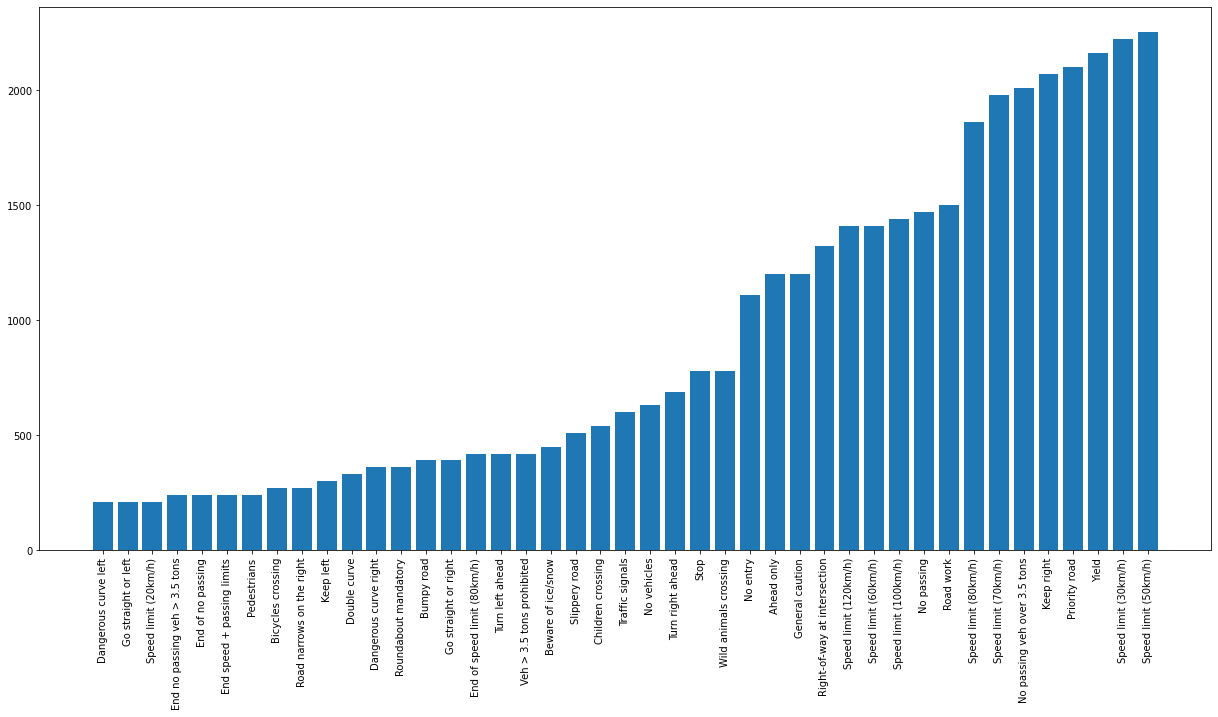

In [73]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

Визуализация 25 случайных изображений из тестовых данных

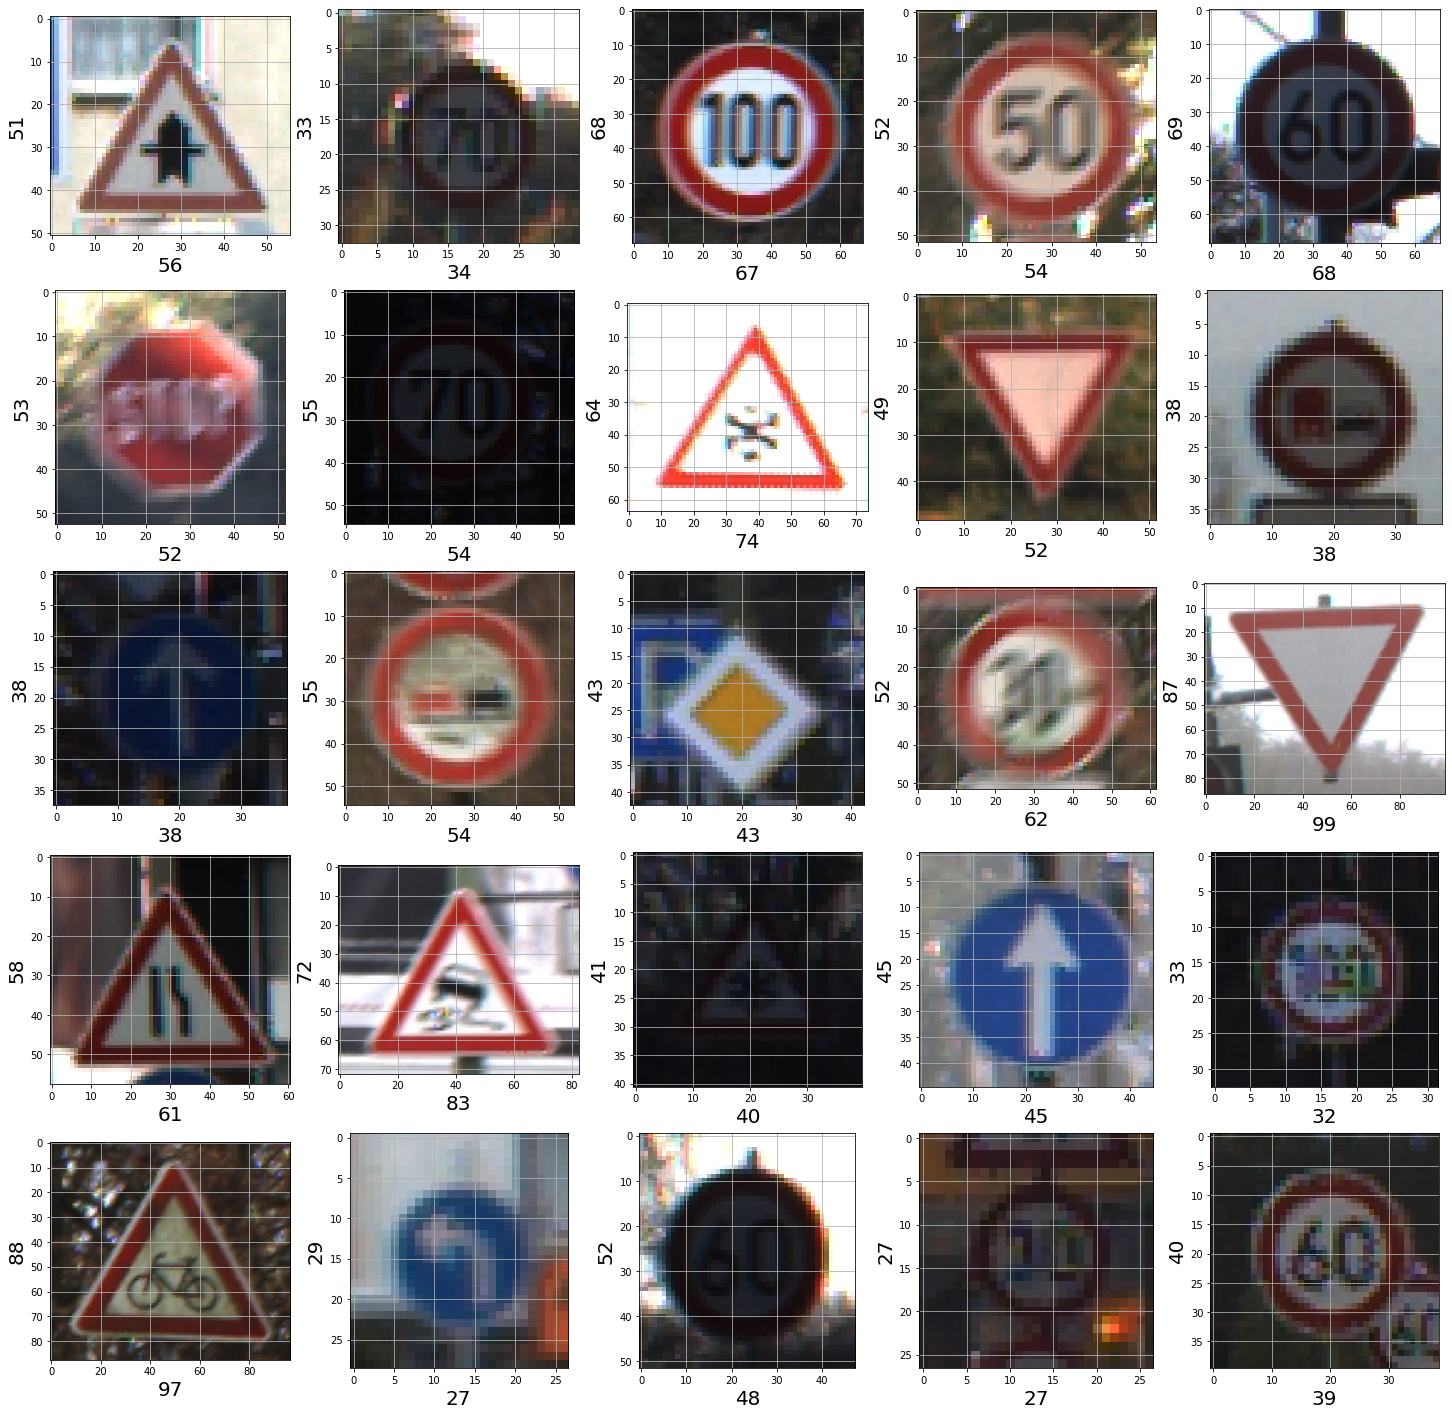

In [74]:

import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

Сбор обучающих данных

In [75]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


Перемешиваем обучающие данные

In [77]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

Разделение данных на обучающий и тестовые датасеты

In [78]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


Указываем лэйблы для данных

In [79]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


#Нейронная сеть и ее обучение
Создаем модель нейронной сети

In [80]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [81]:
lr = 0.001
epochs = 30

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Дополнение данных и обучение модели

In [82]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 72s 83ms/step - loss: 1.0434 - accuracy: 0.7196 - val_loss: 0.0796 - val_accuracy: 0.9736
Epoch 2/30
858/858 [==============================] - 77s 90ms/step - loss: 0.1736 - accuracy: 0.9467 - val_loss: 0.0422 - val_accuracy: 0.9872
Epoch 3/30
858/858 [==============================] - 70s 81ms/step - loss: 0.0960 - accuracy: 0.9704 - val_loss: 0.0308 - val_accuracy: 0.9901
Epoch 4/30
858/858 [==============================] - 69s 80ms/step - loss: 0.0836 - accuracy: 0.9742 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 5/30
858/858 [==============================] - 66s 77ms/step - loss: 0.0670 - accuracy: 0.9805 - val_loss: 0.0127 - val_accuracy: 0.9967
Epoch 6/30
858/858 [==============================] - 65s 76ms/step - loss: 0.0556 - accuracy: 0.9834 - val_loss: 0.0082 - val_accuracy: 0.9977
Epoch 7/30
858/858 [==============================] - 66s 77ms/step - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.0083 - val_accuracy:

Оценка модели

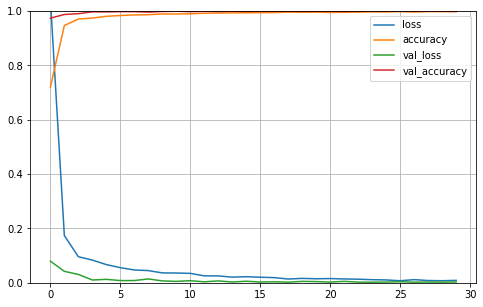

In [83]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##Проверка качества модели

Загрузка тестовых данных и проверка предсказательной способности модели

In [89]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict(X_test)
val_pred = np.argmax(pred, axis=1)

print('Точность модели на тестовых данных: ',accuracy_score(labels, val_pred)*100)

395/395 [==============================] - 7s 18ms/step
Точность модели на тестовых данных:  98.59857482185274


Визуализация confusion matrix

In [92]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, val_pred)

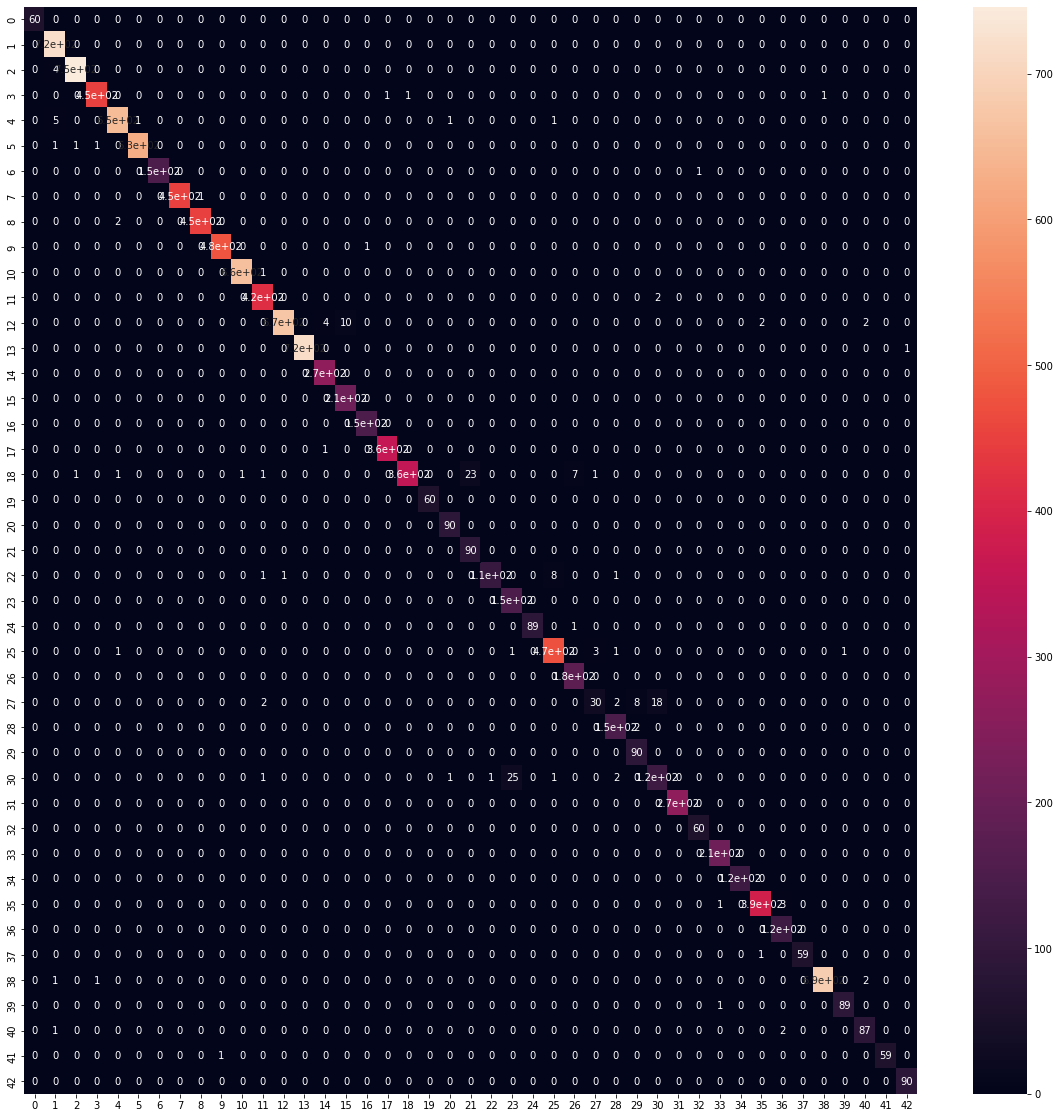

In [93]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

Отчет о классификации

In [95]:
from sklearn.metrics import classification_report

print(classification_report(labels, val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      1.00      0.99       720
           2       1.00      0.99      1.00       750
           3       1.00      0.99      0.99       450
           4       0.99      0.99      0.99       660
           5       1.00      1.00      1.00       630
           6       1.00      0.99      1.00       150
           7       1.00      1.00      1.00       450
           8       1.00      1.00      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      1.00      0.99       420
          12       1.00      0.97      0.99       690
          13       1.00      1.00      1.00       720
          14       0.98      1.00      0.99       270
          15       0.95      1.00      0.98       210
          16       0.99      1.00      1.00       150
          17       1.00    

Прогнозы по тестовым данным

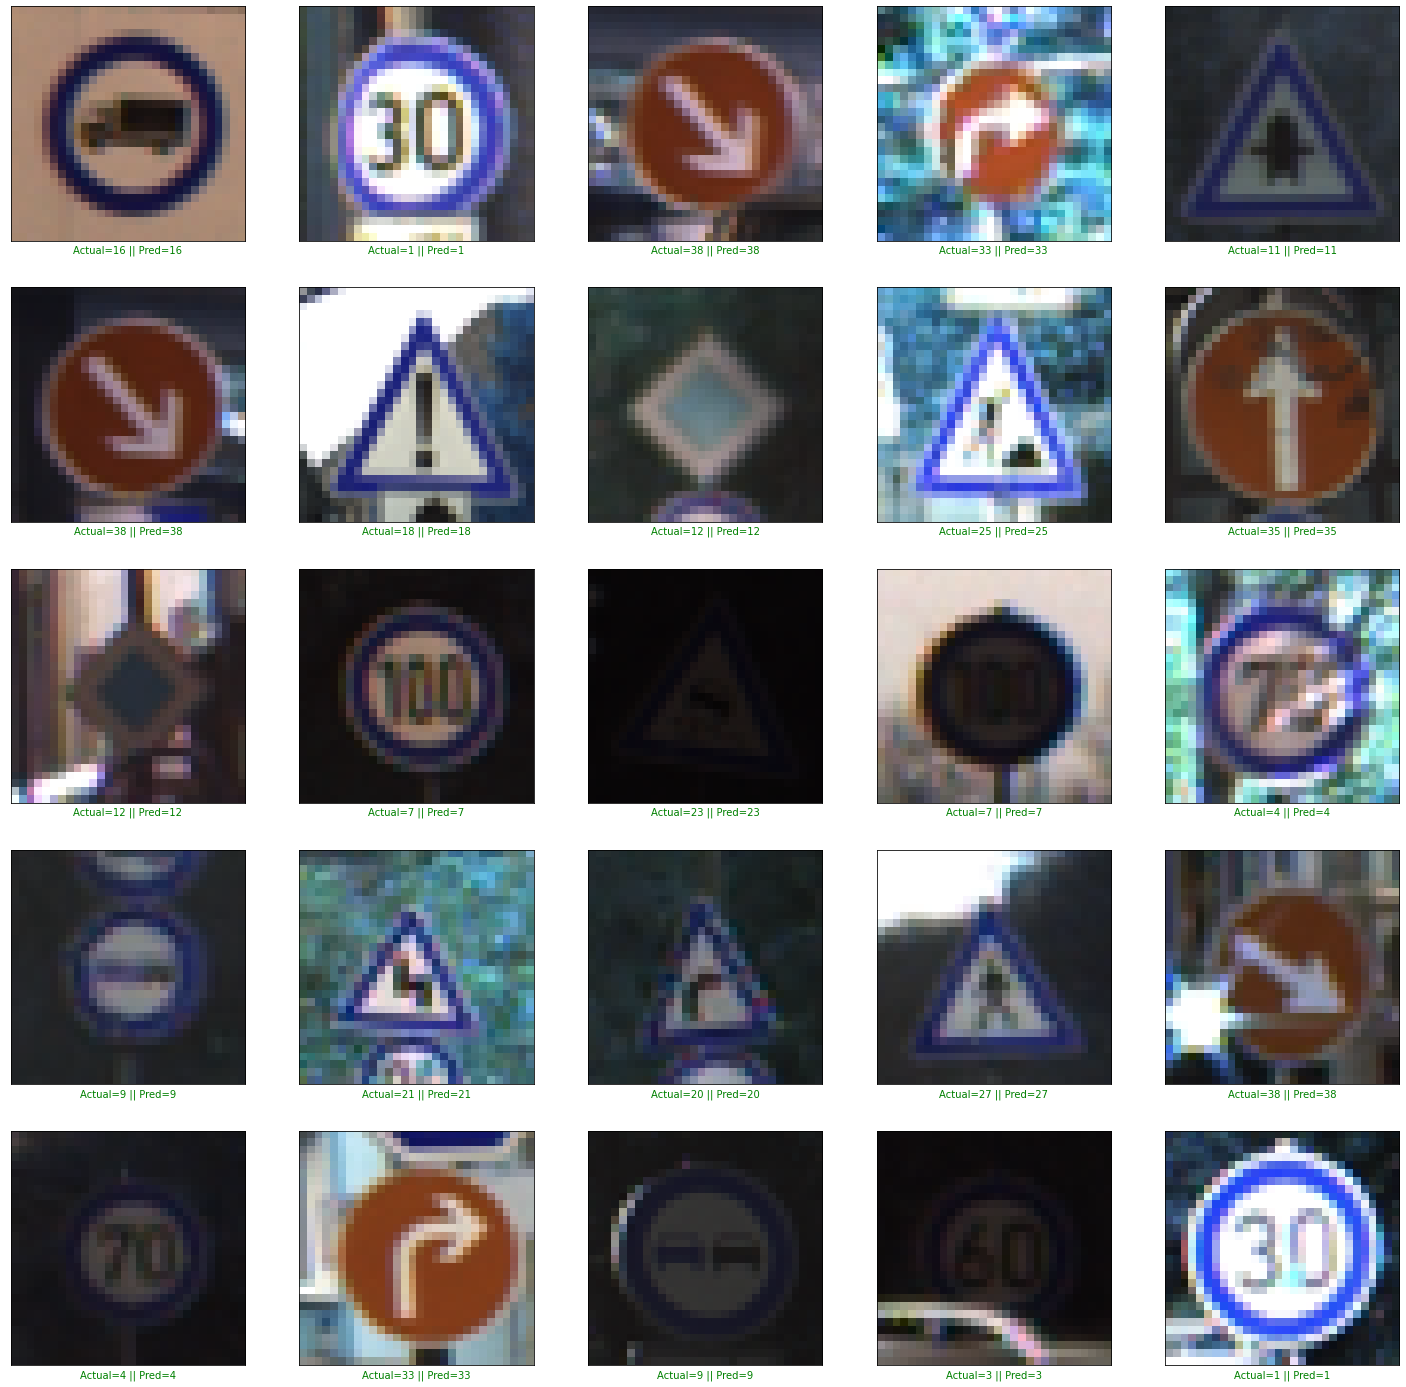

In [97]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = val_pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()